# Penyeimbangan Data (Ecoli)

Penyeimbangan data **Ecoli** dilakukan untuk mengatasi masalah *class imbalance* (ketidakseimbangan kelas),  
di mana jumlah data pada kelas mayoritas jauh lebih besar dibandingkan kelas minoritas.  

Jika kondisi ini tidak diperbaiki:  
- Model *machine learning* akan cenderung bias, hanya fokus pada kelas mayoritas.  
- Kelas minoritas, yang sering menyimpan informasi biologis penting, bisa terabaikan.  

Dengan menyeimbangkan data, distribusi antar kelas menjadi lebih merata sehingga model dapat belajar secara adil  
dan menghasilkan performa yang lebih baik.


## Mendownload Dataset Ecoli dari UCI

Dataset dapat diperoleh melalui tautan berikut:  
🔗 [UCI Machine Learning Repository – Ecoli Dataset](https://archive.ics.uci.edu/dataset/39/ecoli)

Langkah-langkah:  
1. Kunjungi halaman dataset melalui link di atas.  
2. Klik tombol **Download** untuk mengunduh dataset.  

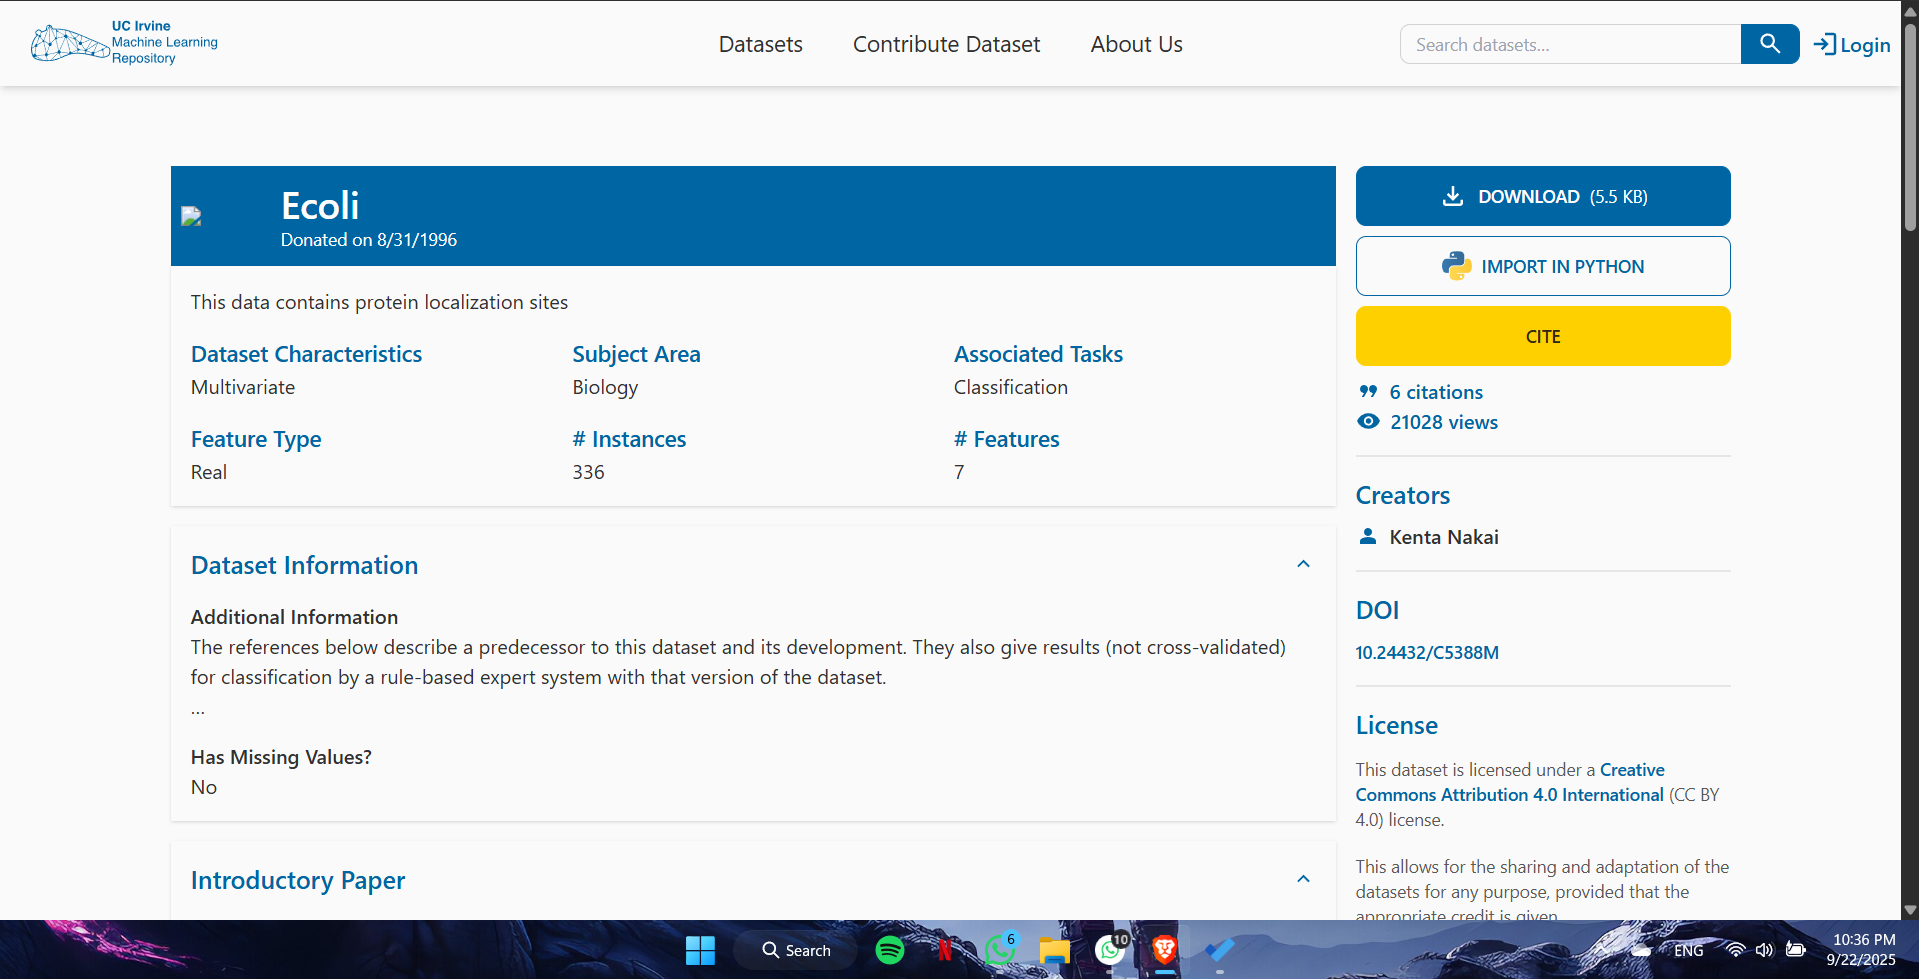



## Konversi Dataset ke Format CSV

Secara default, dataset **Ecoli** yang diunduh dari UCI tidak berbentuk `.csv`.  
Agar dapat digunakan pada database MySQL atau PostgreSQL, dataset harus dikonversi terlebih dahulu menjadi CSV.  

Berikut contoh kode Python untuk melakukan konversi:

```python
import pandas as pd

# Baca file asli Ecoli (format .data atau .txt dari UCI)
# Misalnya nama file: ecoli.data
data = pd.read_csv("ecoli.data", delim_whitespace=True, header=None)

# Tambahkan nama kolom sesuai dokumentasi UCI
data.columns = [
    "sequence", "mcg", "gvh", "lip", "chg",
    "aac", "alm1", "alm2", "class"
]

# Simpan ke dalam format CSV
data.to_csv("ecoli.csv", index=False)

print("Konversi selesai, file disimpan sebagai ecoli.csv")

# **1. Membuat Database MySQL dan Menyimpan Data Ecoli**

## Pendahuluan
Proses pembuatan database MySQL dilakukan dengan menggunakan **cloud database Aiven.io** dan **DBeaver** sebagai client untuk mengelola data. Dataset yang digunakan adalah **Ecoli** yang sebelumnya sudah dikonversi menjadi format CSV. Data ini kemudian akan disimpan ke dalam database agar bisa diproses lebih lanjut.


## 1.1. Membuat Service MySQL pada Aiven.io
1. Kunjungi laman [Aiven.io](https://aiven.io/).
2. Login terlebih dahulu, atau buat akun jika belum memiliki.
3. Buat **Project** sebelum membuat service.
4. Klik **Create Service** dan pilih database **MySQL**.
5. Tentukan konfigurasi service sesuai kebutuhan (region, cloud provider, dsb).



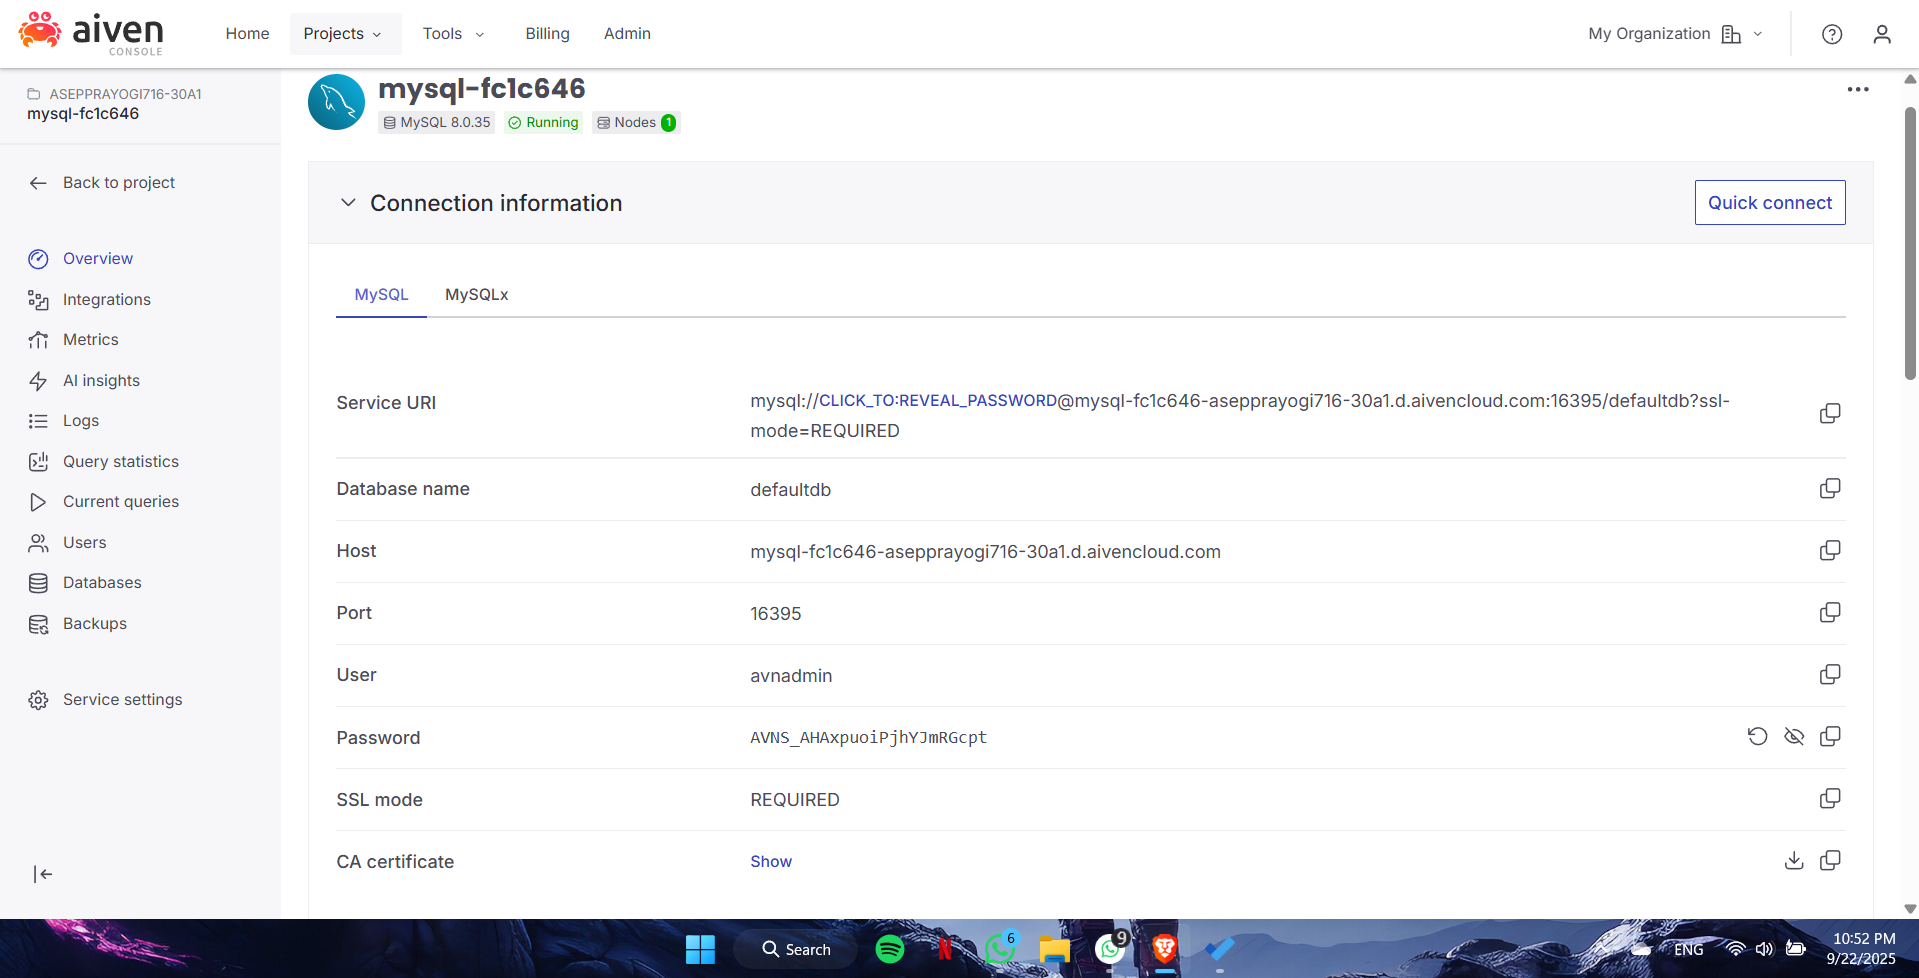


## 1.2. Koneksikan Aiven.io ke DBeaver
Data Ecoli akan dikelola di DBeaver dengan koneksi ke MySQL Aiven.

### Langkah-langkah:
1. **Install DBeaver** melalui situs resmi: [https://dbeaver.io/download/](https://dbeaver.io/download/).
2. Buka DBeaver → **Database → New Database Connection**.
3. Pilih **MySQL** sebagai sumber koneksi.
4. Masukkan kredensial **service MySQL** yang disediakan oleh Aiven.io (host, port, username, password, database).
5. Klik **Test Connection** untuk memastikan koneksi berhasil.


## 1.3. Membuat Database & Tabel
1. Buka **SQL Editor → Open SQL Script** di DBeaver.
2. Buat database dan tabel untuk menyimpan dataset Ecoli.  
   Contoh script sederhana:

```sql
-- Membuat database
CREATE DATABASE ecoli;

-- Menggunakan database
USE ecoli;

-- Membuat tabel untuk dataset Ecoli
CREATE TABLE ecoli (
    id INT AUTO_INCREMENT PRIMARY KEY,
    sequence VARCHAR(20),
    mcg FLOAT,
    gvh FLOAT,
    lip FLOAT,
    chg FLOAT,
    aac FLOAT,
    alm1 FLOAT,
    alm2 FLOAT,
    class_label VARCHAR(10)
);
```
## 1.4. Import Data CSV ke MySQL
  1. Klik kanan tabel → Import Data.
  2. Pilih file ecoli.csv yang sudah dibuat dari konversi dataset.
  3. Sesuaikan mapping kolom CSV dengan kolom tabel MySQL.
  4. Jalankan proses import.
  
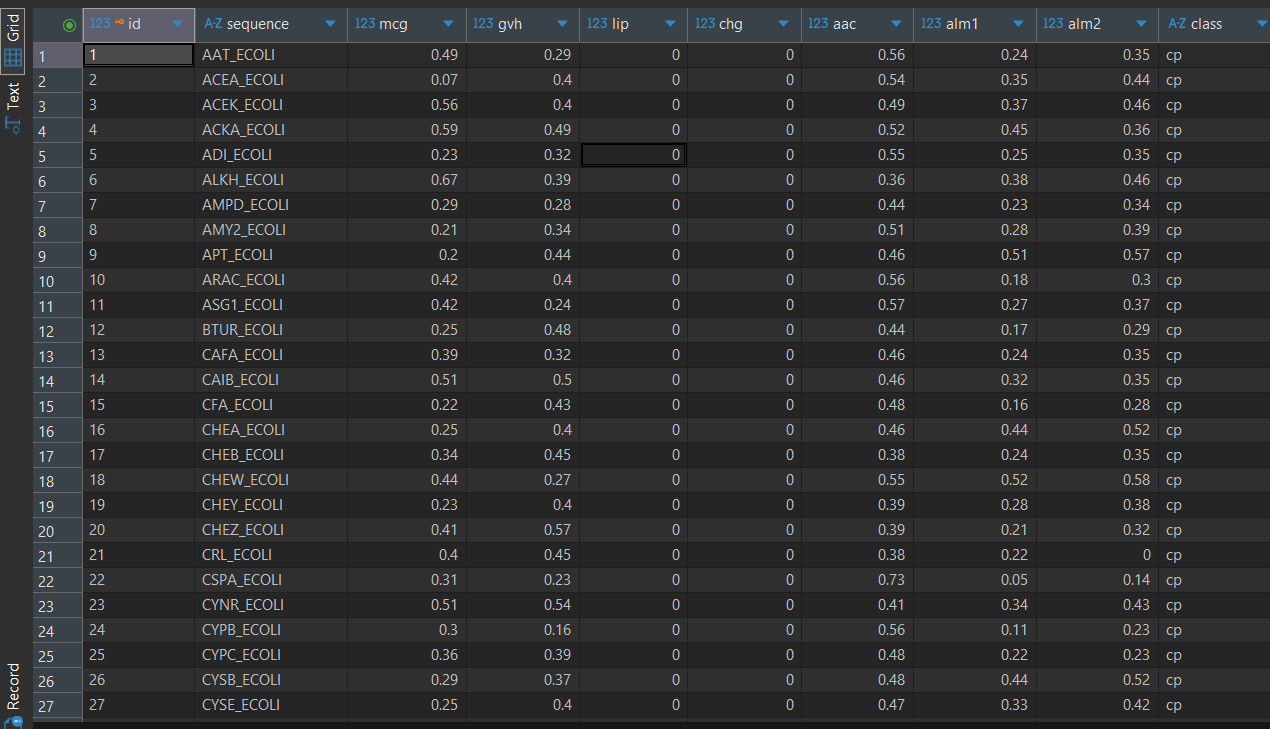


**Hasil Akhir**

Dataset Ecoli kini sudah tersimpan di MySQL melalui Aiven.io dan bisa dikelola di DBeaver. Data ini siap digunakan untuk analisis lebih lanjut, seperti preprocessing, training model, atau integrasi dengan tools visualisasi.

# **2. Visualisasi Data Ecoli**

Sebelum menampilkan data dalam bentuk **scatter plot**, perlu dilakukan koneksi ke database MySQL (Aiven.io) untuk mengambil dataset Ecoli. Setelah itu, data divisualisasikan menggunakan **PCA (Principal Component Analysis)** agar dapat ditampilkan ke dalam dimensi rendah (2 dimensi).


## 2.1. Install dan Import Library


In [31]:
!pip install pymysql
!pip install imbalanced-learn

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pymysql
from imblearn.over_sampling import ADASYN, SMOTE
from collections import Counter

In [33]:
import pandas as pd
import pymysql
from sqlalchemy import create_engine

try:
    host = "mysql-fc1c646-asepprayogi716-30a1.d.aivencloud.com"
    port = 16395
    user = "avnadmin"
    password = "AVNS_AHAxpuoiPjhYJmRGcpt"
    database = "defaultdb"

    # Buat engine SQLAlchemy
    engine = create_engine(f"mysql+pymysql://{user}:{password}@{host}:{port}/{database}")

    # Query tabel
    query = "SELECT * FROM ecoli;"
    df = pd.read_sql(query, engine)

    print("✅ Data berhasil dimuat dari Aiven!")
    print(f"   Jumlah baris: {len(df)}")
    print(f"   Nama kolom: {df.columns.tolist()}")

    # Simpan ke CSV
    output_file = "data_ecoli_original.csv"
    df.to_csv(output_file, index=False)
    print(f"✅ Data disimpan ke '{output_file}'")
    print(f"   Shape: {df.shape}")

except Exception as e:
    print(f"Error: {e}")
    df = None


✅ Data berhasil dimuat dari Aiven!
   Jumlah baris: 336
   Nama kolom: ['id', 'sequence', 'mcg', 'gvh', 'lip', 'chg', 'aac', 'alm1', 'alm2', 'class']
✅ Data disimpan ke 'data_ecoli_original.csv'
   Shape: (336, 10)


## 2.2. Visualisasi Distribusi kelas

Distribusi kelas:
cp: 143 samples (42.6%)
im: 77 samples (22.9%)
imL: 2 samples (0.6%)
imS: 2 samples (0.6%)
imU: 35 samples (10.4%)
om: 20 samples (6.0%)
omL: 5 samples (1.5%)
pp: 52 samples (15.5%)


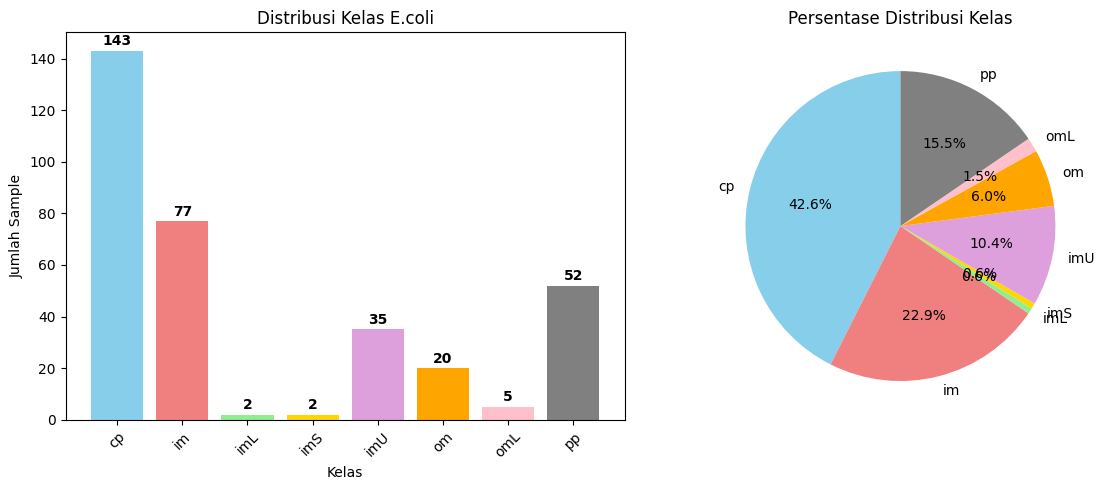


Kelas terbanyak: cp (42.6%)
Kelas tersedikit: imL (0.6%)
Rasio ketidakseimbangan: 71.5:1
Status: TIDAK SEIMBANG


In [34]:
if df is not None:
    class_counts = df['class'].value_counts().sort_index()

    print("Distribusi kelas:")
    for class_name, count in class_counts.items():
        percentage = (count / len(df)) * 100
        print(f"{class_name}: {count} samples ({percentage:.1f}%)")

    # Plot sederhana
    plt.figure(figsize=(12, 5))

    # 1. Bar Chart
    plt.subplot(1, 2, 1)
    colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold', 'plum', 'orange', 'pink', 'gray']
    bars = plt.bar(class_counts.index, class_counts.values, color=colors[:len(class_counts)])
    plt.xlabel('Kelas')
    plt.ylabel('Jumlah Sample')
    plt.title('Distribusi Kelas E.coli')
    plt.xticks(rotation=45)

    # Tambah label angka di atas bar
    for bar, count in zip(bars, class_counts.values):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                str(count), ha='center', va='bottom', fontweight='bold')

    # 2. Pie Chart
    plt.subplot(1, 2, 2)
    plt.pie(class_counts.values, labels=class_counts.index, autopct='%1.1f%%',
            colors=colors[:len(class_counts)], startangle=90)
    plt.title('Persentase Distribusi Kelas')

    plt.tight_layout()
    plt.show()

    # Status keseimbangan
    max_pct = (class_counts.max() / len(df)) * 100
    min_pct = (class_counts.min() / len(df)) * 100
    ratio = max_pct / min_pct

    print(f"\nKelas terbanyak: {class_counts.idxmax()} ({max_pct:.1f}%)")
    print(f"Kelas tersedikit: {class_counts.idxmin()} ({min_pct:.1f}%)")
    print(f"Rasio ketidakseimbangan: {ratio:.1f}:1")

    if ratio > 3:
        print("Status: TIDAK SEIMBANG")
    else:
        print("Status: RELATIF SEIMBANG")

else:
    print("Data tidak tersedia!")

## 2.3. Tampilkan data pada scatter plot hasil reduksi dimensi PCA (2D).

Data shape: (336, 10)
Columns: ['id', 'sequence', 'mcg', 'gvh', 'lip', 'chg', 'aac', 'alm1', 'alm2', 'class']


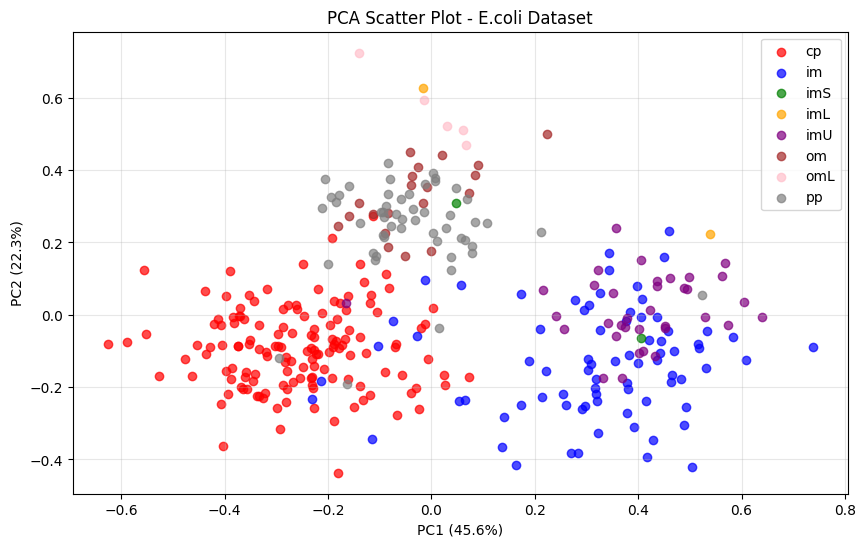

Total variance explained: 67.8%
PCA components shape: (336, 2)

DataFrame PCA (5 baris pertama):
          PC1       PC2 class
0   -0.286507 -0.033912    cp
1   -0.293156 -0.317070    cp
2   -0.105697  0.008691    cp
3   -0.088433  0.111345    cp
4   -0.367884 -0.199937    cp
..        ...       ...   ...
331  0.084373  0.255707    pp
332 -0.138928  0.254940    pp
333 -0.112290  0.170329    pp
334 -0.106618  0.162533    pp
335  0.108338  0.252528    pp

[336 rows x 3 columns]


In [35]:
if df is not None:
    print(f"Data shape: {df.shape}")
    print(f"Columns: {df.columns.tolist()}")

    feature_columns = ['mcg', 'gvh', 'lip', 'chg', 'aac', 'alm1', 'alm2']
    X = df[feature_columns]
    y = df['class']

    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    dataframe_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
    dataframe_pca['class'] = y.values

    # Plot scatter
    plt.figure(figsize=(10, 6))

    colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray']
    for i, class_name in enumerate(y.unique()):
        mask = y == class_name
        plt.scatter(X_pca[mask, 0], X_pca[mask, 1],
                    c=colors[i], label=class_name, alpha=0.7)

    plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
    plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
    plt.title('PCA Scatter Plot - E.coli Dataset')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

    print(f"Total variance explained: {sum(pca.explained_variance_ratio_):.1%}")
    print("PCA components shape:", X_pca.shape)
    print("\nDataFrame PCA (5 baris pertama):")
    print(dataframe_pca)

# **3. Penyeimbangan Data**
## 3.1. Penyeimbangan data menggunakan ADASYN

In [36]:
print("Distribusi kelas sebelum ADASYN:")
print(f"{sorted(Counter(y).items())}")

nt = X
ns = y

temp = sorted(class_counts)
print(f"Sorted counts untuk iterasi: {temp}")

for i in range(0, 7):
    n = max(1, temp[i] - 1)

    print(f"\nIterasi {i+1}: menggunakan k_neighbors={n}")

    try:
        nt, ns = ADASYN(n_neighbors=n, sampling_strategy='minority').fit_resample(nt, ns)
        print(f"Hasil iterasi {i+1}: {sorted(Counter(ns).items())}")
    except Exception as e:
        print(f"Error pada iterasi {i+1}: {e}")
        break

print(f"\nDistribusi kelas setelah ADASYN:")
print(f"{sorted(Counter(ns).items())}")

print(f"\nTotal samples sebelum: {len(y)}")
print(f"Total samples setelah: {len(ns)}")
print(f"Data yang ditambahkan: {len(ns) - len(y)}")

# Convert ADASYN ke CSV
df_adasyn = pd.DataFrame(nt, columns=['mcg', 'gvh', 'lip', 'chg', 'aac', 'alm1', 'alm2'])
df_adasyn['class'] = ns
df_adasyn.to_csv('data_ecoli_adasyn.csv', index=False)
print(f"✅ Data ADASYN disimpan ke 'data_ecoli_adasyn.csv' - {len(df_adasyn)} rows")

Distribusi kelas sebelum ADASYN:
[('cp', 143), ('im', 77), ('imL', 2), ('imS', 2), ('imU', 35), ('om', 20), ('omL', 5), ('pp', 52)]
Sorted counts untuk iterasi: [2, 2, 5, 20, 35, 52, 77, 143]

Iterasi 1: menggunakan k_neighbors=1
Hasil iterasi 1: [('cp', 143), ('im', 77), ('imL', 142), ('imS', 2), ('imU', 35), ('om', 20), ('omL', 5), ('pp', 52)]

Iterasi 2: menggunakan k_neighbors=1
Hasil iterasi 2: [('cp', 143), ('im', 77), ('imL', 142), ('imS', 142), ('imU', 35), ('om', 20), ('omL', 5), ('pp', 52)]

Iterasi 3: menggunakan k_neighbors=4
Hasil iterasi 3: [('cp', 143), ('im', 77), ('imL', 142), ('imS', 142), ('imU', 35), ('om', 20), ('omL', 144), ('pp', 52)]

Iterasi 4: menggunakan k_neighbors=19
Hasil iterasi 4: [('cp', 143), ('im', 77), ('imL', 142), ('imS', 142), ('imU', 35), ('om', 144), ('omL', 144), ('pp', 52)]

Iterasi 5: menggunakan k_neighbors=34
Hasil iterasi 5: [('cp', 143), ('im', 77), ('imL', 142), ('imS', 142), ('imU', 146), ('om', 144), ('omL', 144), ('pp', 52)]

Iterasi 

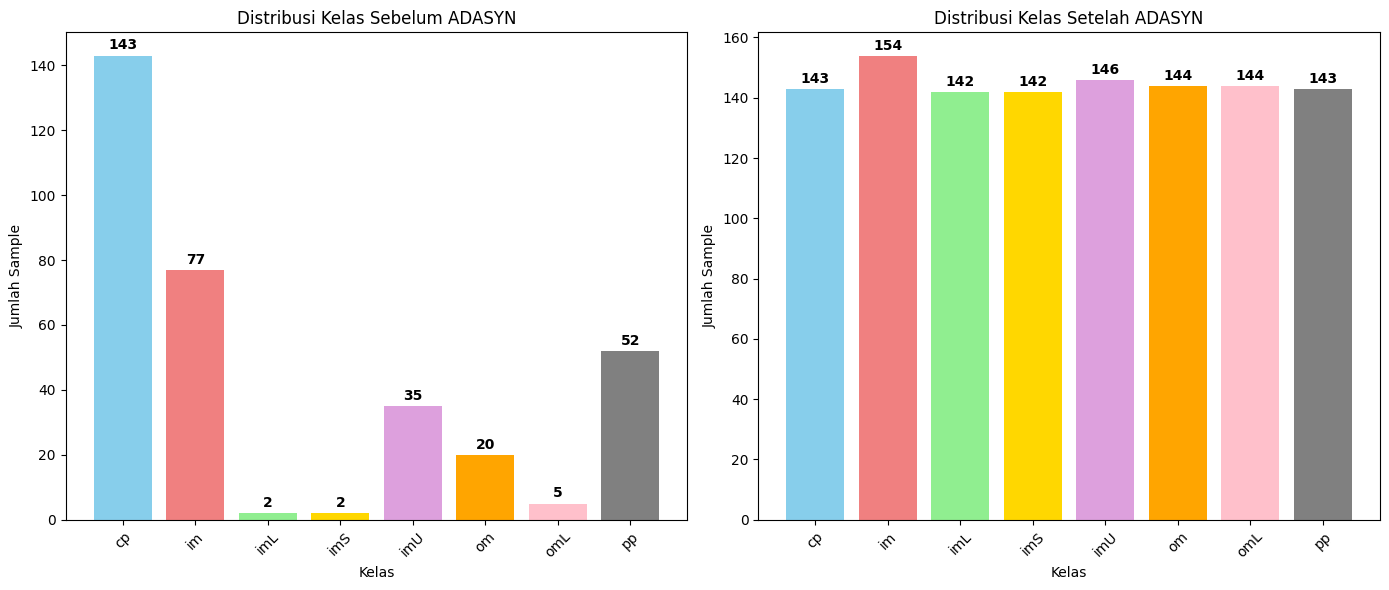


=== SUMMARY ADASYN ===
Peningkatan per kelas:
  cp: 0 samples (143 → 143)
  im: +77 samples (77 → 154)
  imL: +140 samples (2 → 142)
  imS: +140 samples (2 → 142)
  imU: +111 samples (35 → 146)
  om: +124 samples (20 → 144)
  omL: +139 samples (5 → 144)
  pp: +91 samples (52 → 143)


In [37]:
# Visualisasi perbandingan sebelum dan sesudah ADASYN
plt.figure(figsize=(14, 6))


original_counts = Counter(y)
adasyn_counts = Counter(ns)
classes = sorted(original_counts.keys())

original_values = [original_counts[cls] for cls in classes]
adasyn_values = [adasyn_counts[cls] for cls in classes]

# Plot 1: Sebelum ADASYN
plt.subplot(1, 2, 1)
colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold', 'plum', 'orange', 'pink', 'gray']
bars1 = plt.bar(classes, original_values, color=colors[:len(classes)])
plt.xlabel('Kelas')
plt.ylabel('Jumlah Sample')
plt.title('Distribusi Kelas Sebelum ADASYN')
plt.xticks(rotation=45)

for bar, count in zip(bars1, original_values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
            str(count), ha='center', va='bottom', fontweight='bold')

# Plot 2: Setelah ADASYN
plt.subplot(1, 2, 2)
bars2 = plt.bar(classes, adasyn_values, color=colors[:len(classes)])
plt.xlabel('Kelas')
plt.ylabel('Jumlah Sample')
plt.title('Distribusi Kelas Setelah ADASYN')
plt.xticks(rotation=45)

for bar, count in zip(bars2, adasyn_values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
            str(count), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n=== SUMMARY ADASYN ===")
print(f"Peningkatan per kelas:")
for cls in classes:
    increase = adasyn_counts[cls] - original_counts[cls]
    if increase > 0:
        print(f"  {cls}: +{increase} samples ({original_counts[cls]} → {adasyn_counts[cls]})")
    else:
        print(f"  {cls}: {increase} samples ({original_counts[cls]} → {adasyn_counts[cls]})")

### Ploting Data Setelah Proses ADASYN menggunakan PCA

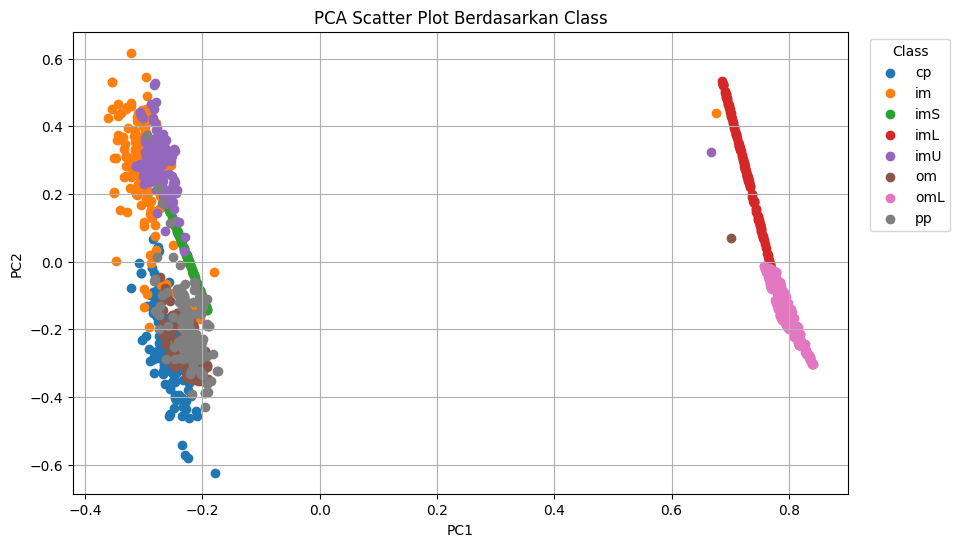

In [38]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(nt)

data_pca = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
data_pca['localization_class'] = ns

plt.figure(figsize=(10,6))
for label in data_pca['localization_class'].unique():
    subset = data_pca[data_pca['localization_class'] == label]
    plt.scatter(subset['PC1'], subset['PC2'], label=label)

plt.xlabel("PC1")
plt.ylabel("PC2")

plt.title("PCA Scatter Plot Berdasarkan Class")
plt.legend(title="Class", bbox_to_anchor=(1.02, 1), loc='upper left')
plt.grid()

plt.show()

## 3.2. Penyeimbangan Data menggunakan SMOTE

In [39]:
print("Distribusi kelas sebelum SMOTE:")
print(f"{sorted(Counter(y).items())}")

smote = SMOTE(random_state=42, k_neighbors=1)
X_res, y_res = smote.fit_resample(X, y)

print(f"\nDistribusi kelas setelah SMOTE:")
print(f"{sorted(Counter(y_res).items())}")

print(f"\nTotal samples sebelum: {len(y)}")
print(f"Total samples setelah: {len(y_res)}")
print(f"Data yang ditambahkan: {len(y_res) - len(y)}")

# Convert SMOTE ke CSV
df_smote = pd.DataFrame(X_res, columns=['mcg', 'gvh', 'lip', 'chg', 'aac', 'alm1', 'alm2'])
df_smote['class'] = y_res
df_smote.to_csv('data_ecoli_smote.csv', index=False)
print(f"✅ Data SMOTE disimpan ke 'data_ecoli_smote.csv' - {len(df_smote)} rows")

Distribusi kelas sebelum SMOTE:
[('cp', 143), ('im', 77), ('imL', 2), ('imS', 2), ('imU', 35), ('om', 20), ('omL', 5), ('pp', 52)]

Distribusi kelas setelah SMOTE:
[('cp', 143), ('im', 143), ('imL', 143), ('imS', 143), ('imU', 143), ('om', 143), ('omL', 143), ('pp', 143)]

Total samples sebelum: 336
Total samples setelah: 1144
Data yang ditambahkan: 808
✅ Data SMOTE disimpan ke 'data_ecoli_smote.csv' - 1144 rows


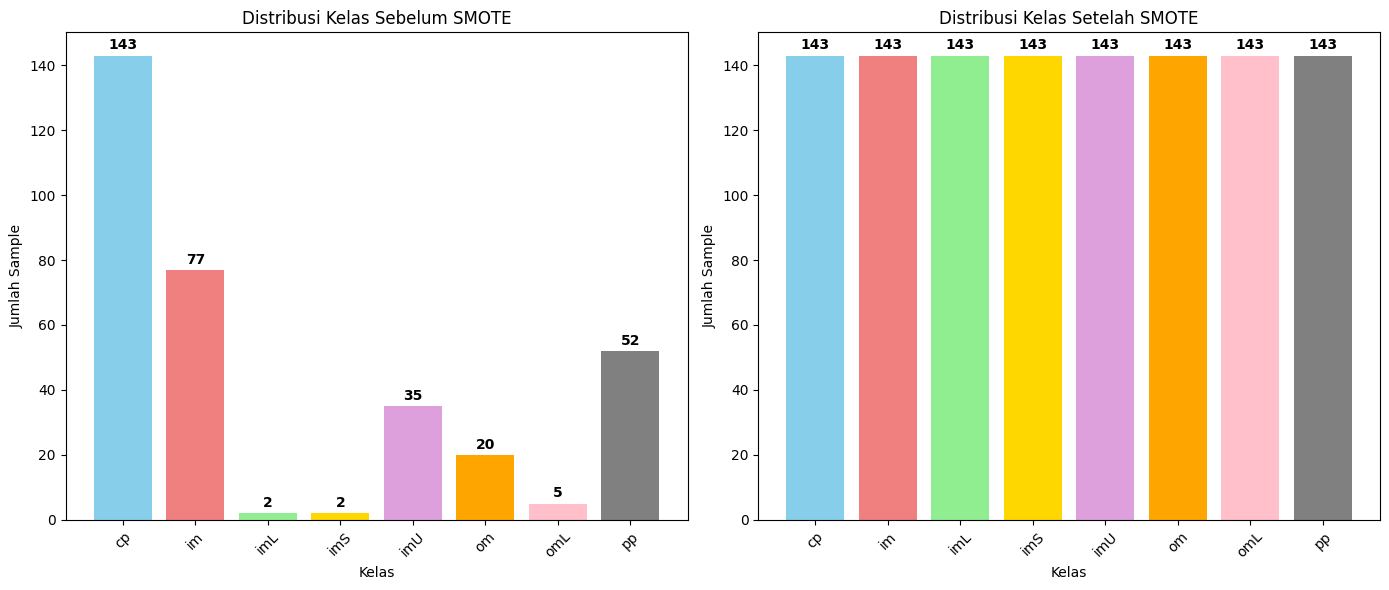


=== SUMMARY SMOTE ===
Peningkatan per kelas:
  cp: 0 samples (143 → 143)
  im: +66 samples (77 → 143)
  imL: +141 samples (2 → 143)
  imS: +141 samples (2 → 143)
  imU: +108 samples (35 → 143)
  om: +123 samples (20 → 143)
  omL: +138 samples (5 → 143)
  pp: +91 samples (52 → 143)


In [40]:
plt.figure(figsize=(14, 6))

original_counts_smote = Counter(y)
smote_counts = Counter(y_res)
classes = sorted(original_counts_smote.keys())

original_values = [original_counts_smote[cls] for cls in classes]
smote_values = [smote_counts[cls] for cls in classes]

# Plot 1: Sebelum SMOTE
plt.subplot(1, 2, 1)
colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold', 'plum', 'orange', 'pink', 'gray']
bars1 = plt.bar(classes, original_values, color=colors[:len(classes)])
plt.xlabel('Kelas')
plt.ylabel('Jumlah Sample')
plt.title('Distribusi Kelas Sebelum SMOTE')
plt.xticks(rotation=45)

for bar, count in zip(bars1, original_values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
            str(count), ha='center', va='bottom', fontweight='bold')

# Plot 2: Setelah SMOTE
plt.subplot(1, 2, 2)
bars2 = plt.bar(classes, smote_values, color=colors[:len(classes)])
plt.xlabel('Kelas')
plt.ylabel('Jumlah Sample')
plt.title('Distribusi Kelas Setelah SMOTE')
plt.xticks(rotation=45)

for bar, count in zip(bars2, smote_values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
            str(count), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n=== SUMMARY SMOTE ===")
print(f"Peningkatan per kelas:")
for cls in classes:
    increase = smote_counts[cls] - original_counts_smote[cls]
    if increase > 0:
        print(f"  {cls}: +{increase} samples ({original_counts_smote[cls]} → {smote_counts[cls]})")
    else:
        print(f"  {cls}: {increase} samples ({original_counts_smote[cls]} → {smote_counts[cls]})")

### Ploting Data Setelah Proses SMOTE menggunakan PCA

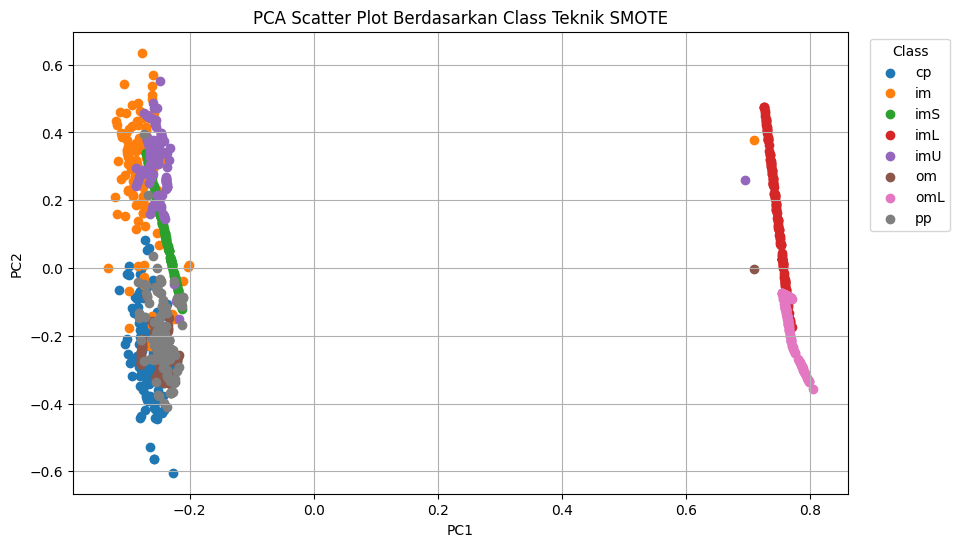

In [41]:
pcba = PCA(n_components=2)
pca_result = pcba.fit_transform(X_res)
data_pca = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
data_pca['localization_class'] = y_res

plt.figure(figsize=(10,6))
for label in data_pca['localization_class'].unique():
    subset = data_pca[data_pca['localization_class'] == label]
    plt.scatter(subset['PC1'], subset['PC2'], label=label)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Scatter Plot Berdasarkan Class Teknik SMOTE")
plt.legend(title="Class", bbox_to_anchor=(1.02, 1), loc='upper left')
plt.grid()
plt.show()

## 3.3. Perbandingan Jumlah Data Original, ADASYN, SMOTE

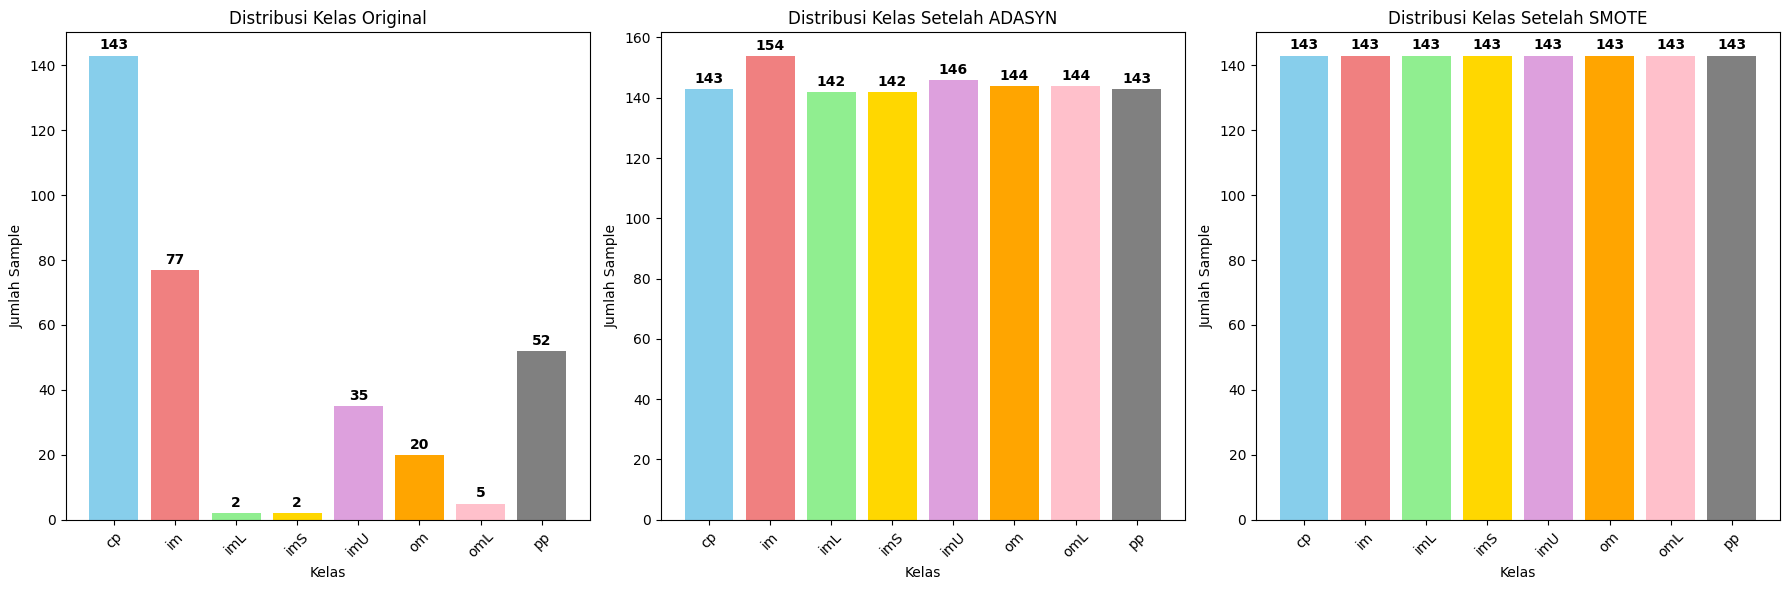


=== PERBANDINGAN KETIGA METODE ===
Original  - Total: 336
ADASYN    - Total: 1158, Penambahan: +822
SMOTE     - Total: 1144, Penambahan: +808


In [42]:
plt.figure(figsize=(18, 6))

original_counts = Counter(y)
adasyn_counts = Counter(ns)
smote_counts = Counter(y_res)
classes = sorted(original_counts.keys())

original_values = [original_counts[cls] for cls in classes]
adasyn_values = [adasyn_counts[cls] for cls in classes]
smote_values = [smote_counts[cls] for cls in classes]

colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold', 'plum', 'orange', 'pink', 'gray']

# Plot 1: Data Original
plt.subplot(1, 3, 1)
bars1 = plt.bar(classes, original_values, color=colors[:len(classes)])
plt.xlabel('Kelas')
plt.ylabel('Jumlah Sample')
plt.title('Distribusi Kelas Original')
plt.xticks(rotation=45)

for bar, count in zip(bars1, original_values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
            str(count), ha='center', va='bottom', fontweight='bold')

# Plot 2: Setelah ADASYN
plt.subplot(1, 3, 2)
bars2 = plt.bar(classes, adasyn_values, color=colors[:len(classes)])
plt.xlabel('Kelas')
plt.ylabel('Jumlah Sample')
plt.title('Distribusi Kelas Setelah ADASYN')
plt.xticks(rotation=45)

for bar, count in zip(bars2, adasyn_values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
            str(count), ha='center', va='bottom', fontweight='bold')

# Plot 3: Setelah SMOTE
plt.subplot(1, 3, 3)
bars3 = plt.bar(classes, smote_values, color=colors[:len(classes)])
plt.xlabel('Kelas')
plt.ylabel('Jumlah Sample')
plt.title('Distribusi Kelas Setelah SMOTE')
plt.xticks(rotation=45)

for bar, count in zip(bars3, smote_values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
            str(count), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n=== PERBANDINGAN KETIGA METODE ===")
print(f"Original  - Total: {len(y)}")
print(f"ADASYN    - Total: {len(ns)}, Penambahan: +{len(ns) - len(y)}")
print(f"SMOTE     - Total: {len(y_res)}, Penambahan: +{len(y_res) - len(y)}")